<a href="https://colab.research.google.com/github/josware/mcc_tareas/blob/master/nlp_Question_and_Answer_BERT_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo BERT pre-entrenado para el problema de Preguntas y Respuestas

Nos basaremos en la librería HuggingFace que nos proporciona modelos Transformer pre-entrenados:

https://huggingface.co/

https://github.com/huggingface/transformers/


En particular este ejemplo está basado en el pequeño ejemplo mostrado para el modelo pre-entrenado TFBertForQuestionAnswering, que es el modelo BERT_Large pre-entrenado (fine-tuning) para problemas de preguntas y respuestas:

https://huggingface.co/transformers/model_doc/bert.html?highlight=bertforquestionanswering#tfbertforquestionanswering 

https://huggingface.co/transformers/pretrained_models.html


Usaremos además el modelo siguiente pre-entrenado (fine-tuning) con la base de datos SQuad::

https://huggingface.co/bert-large-uncased-whole-word-masking-finetuned-squad

https://rajpurkar.github.io/SQuAD-explorer/


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 7.7MB/s 
     |████████████████████████████████| 901kB 27.5MB/s 
     |████████████████████████████████| 3.3MB 31.9MB/s 


In [ ]:
import tensorflow as tf
import numpy as np

Descargemos el modelo. Estrictamente no se descarga en nuestro disco, sino que el modelo está en algún lugar de la web y que nos proporciona HuggingFace.

Observa que el modelo es de 1.34GB.

In [ ]:
from transformers import TFBertForQuestionAnswering
model = TFBertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


Cargamos el tokenizer con su vocabulario en el caso uncased:

In [ ]:
from transformers import BertTokenizer 

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
tokenizer.vocab_size

30522

## Utilicemos el modelo pre-entrenado para realizar alguna preguntas, dado un texto.

Para este ejemplo usarmos algunos párrafos de Wikipedia sobre Stephen Hawking:

https://en.wikipedia.org/wiki/Stephen_Hawking


Hawking was born in Oxford into a family of doctors. He began his university education at University College, Oxford, in October 1959 at the age of 17, where he received a first-class BA (Hons.) degree in physics. He began his graduate work at Trinity Hall, Cambridge, in October 1962, where he obtained his PhD degree in applied mathematics and theoretical physics, specialising in general relativity and cosmology in March 1966. 

In 1963, Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually paralysed him over the decades.[20][21] After the loss of his speech, he communicated through a speech-generating device initially through use of a handheld switch, and eventually by using a single cheek muscle. Hawking achieved commercial success with several works of popular science in which he discussed his theories and cosmology in general. His book A Brief History of Time appeared on the Sunday Times bestseller list for a record-breaking 237 weeks. Hawking was a Fellow of the Royal Society, a lifetime member of the Pontifical Academy of Sciences, and a recipient of the Presidential Medal of Freedom, the highest civilian award in the United States. In 2002, Hawking was ranked number 25 in the BBC's poll of the 100 Greatest Britons. He died on 14 March 2018 at the age of 76, after living with motor neurone disease for more than 50 years.

In [ ]:
import textwrap
from textwrap import wrap
wrapper = textwrap.TextWrapper(width=70) # ancho del texto a despegar.
#texto = "Hawking was born in Oxford into a family of doctors. He began his university education at University College, Oxford, in October 1959 at the age of 17, where he received a first-class BA (Hons.) degree in physics. He began his graduate work at Trinity Hall, Cambridge, in October 1962, where he obtained his PhD degree in applied mathematics and theoretical physics, specialising in general relativity and cosmology in March 1966. In 1963, Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually paralysed him over the decades.[20][21] After the loss of his speech, he communicated through a speech-generating device initially through use of a handheld switch, and eventually by using a single cheek muscle. Hawking achieved commercial success with several works of popular science in which he discussed his theories and cosmology in general. His book A Brief History of Time appeared on the Sunday Times bestseller list for a record-breaking 237 weeks. Hawking was a Fellow of the Royal Society, a lifetime member of the Pontifical Academy of Sciences, and a recipient of the Presidential Medal of Freedom, the highest civilian award in the United States. In 2002, Hawking was ranked number 25 in the BBC's poll of the 100 Greatest Britons. He died on 14 March 2018 at the age of 76, after living with motor neurone disease for more than 50 years."
texto = "In 1963, Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually paralysed him over the decades.[20][21] After the loss of his speech, he communicated through a speech-generating device initially through use of a handheld switch, and eventually by using a single cheek muscle. Hawking achieved commercial success with several works of popular science in which he discussed his theories and cosmology in general. His book A Brief History of Time appeared on the Sunday Times bestseller list for a record-breaking 237 weeks. Hawking was a Fellow of the Royal Society, a lifetime member of the Pontifical Academy of Sciences, and a recipient of the Presidential Medal of Freedom, the highest civilian award in the United States."
print(wrapper.fill(texto)) #  

In 1963, Hawking was diagnosed with an early-onset slow-progressing
form of motor neurone disease that gradually paralysed him over the
decades.[20][21] After the loss of his speech, he communicated through
a speech-generating device initially through use of a handheld switch,
and eventually by using a single cheek muscle. Hawking achieved
commercial success with several works of popular science in which he
discussed his theories and cosmology in general. His book A Brief
History of Time appeared on the Sunday Times bestseller list for a
record-breaking 237 weeks. Hawking was a Fellow of the Royal Society,
a lifetime member of the Pontifical Academy of Sciences, and a
recipient of the Presidential Medal of Freedom, the highest civilian
award in the United States.


In [ ]:
question = "what disease did Hawking have?"

#question = "How did Hawking talk?"
#question = "What is the title of his best-seller?"

In [ ]:
# Apply the tokenizer to the input text, treating them as a text-pair.
input_ids = tokenizer.encode(question, texto)
print('The input has a total of {:} tokens.'.format(len(input_ids)))

The input has a total of 165 tokens.


In [ ]:
# BERT only needs the token IDs, but for the purpose of inspecting the 
# tokenizer's behavior, let's also get the token strings and display them.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):
    
    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')
    
    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')
    

[CLS]           101
what          2,054
disease       4,295
did           2,106
hawk          9,881
##ing         2,075
have          2,031
?             1,029

[SEP]           102

in            1,999
1963          3,699
,             1,010
hawk          9,881
##ing         2,075
was           2,001
diagnosed    11,441
with          2,007
an            2,019
early         2,220
-             1,011
onset        14,447
slow          4,030
-             1,011
progressing  27,673
form          2,433
of            1,997
motor         5,013
ne           11,265
##uron       21,017
##e           2,063
disease       4,295
that          2,008
gradually     6,360
para         11,498
##ly          2,135
##sed         6,924
him           2,032
over          2,058
the           1,996
decades       5,109
.             1,012
[             1,031
20            2,322
]             1,033
[             1,031
21            2,538
]             1,033
after         2,044
the           1,996
loss          3,27

In [ ]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

In [ ]:
tf.convert_to_tensor([input_ids], np.int32) 

<tf.Tensor: shape=(1, 165), dtype=int32, numpy=
array([[  101,  2054,  4295,  2106,  9881,  2075,  2031,  1029,   102,
         1999,  3699,  1010,  9881,  2075,  2001, 11441,  2007,  2019,
         2220,  1011, 14447,  4030,  1011, 27673,  2433,  1997,  5013,
        11265, 21017,  2063,  4295,  2008,  6360, 11498,  2135,  6924,
         2032,  2058,  1996,  5109,  1012,  1031,  2322,  1033,  1031,
         2538,  1033,  2044,  1996,  3279,  1997,  2010,  4613,  1010,
         2002, 24162,  2083,  1037,  4613,  1011, 11717,  5080,  3322,
         2083,  2224,  1997,  1037, 27291,  6942,  1010,  1998,  2776,
         2011,  2478,  1037,  2309,  5048,  6740,  1012,  9881,  2075,
         4719,  3293,  3112,  2007,  2195,  2573,  1997,  2759,  2671,
         1999,  2029,  2002,  6936,  2010,  8106,  1998,  2522, 25855,
         6483,  1999,  2236,  1012,  2010,  2338,  1037,  4766,  2381,
         1997,  2051,  2596,  2006,  1996,  4465,  2335, 24304,  2862,
         2005,  1037,  2501, 

In [ ]:
outputs = model(tf.convert_to_tensor([input_ids], dtype=np.int32),
                token_type_ids = tf.convert_to_tensor([segment_ids], dtype=np.int32) , 
                return_dict=True) 

start_scores = outputs.start_logits
end_scores = outputs.end_logits


In [ ]:
#start_scores
#end_scores

In [ ]:
start_scores   # EagerTensor

<tf.Tensor: shape=(1, 165), dtype=float32, numpy=
array([[-6.2626867 , -5.9610276 , -8.7120285 , -8.183073  , -8.226184  ,
        -8.46534   , -7.8794847 , -9.3396    , -6.2626634 , -2.1222382 ,
        -1.591621  , -5.3977404 , -3.0311382 , -6.376551  , -4.5583696 ,
        -1.2183233 , -1.8743906 ,  2.4016147 ,  0.91241074, -5.5248923 ,
        -2.8237574 ,  0.71562743, -5.5171885 , -2.6439428 , -0.03564049,
        -0.5422588 ,  7.8763447 ,  1.243043  , -2.5391746 , -3.9831192 ,
        -1.640624  , -4.855041  , -2.006375  , -1.7772392 , -6.2545953 ,
        -7.344989  , -6.2616296 , -7.951708  , -8.485719  , -6.3239107 ,
        -6.1802373 , -5.9092383 , -7.913073  , -8.608691  , -6.3578253 ,
        -7.917977  , -9.093451  , -6.770251  , -7.2868047 , -4.588232  ,
        -8.722131  , -6.7075477 , -4.3989043 , -8.2336445 , -6.3930483 ,
        -7.047849  , -8.619581  , -8.470962  , -5.3640046 , -8.377108  ,
        -8.044266  , -8.166467  , -7.761246  , -8.703542  , -8.2493    ,
 

In [ ]:
start_scores.shape

TensorShape([1, 165])

In [ ]:
tokens

['[CLS]',
 'what',
 'disease',
 'did',
 'hawk',
 '##ing',
 'have',
 '?',
 '[SEP]',
 'in',
 '1963',
 ',',
 'hawk',
 '##ing',
 'was',
 'diagnosed',
 'with',
 'an',
 'early',
 '-',
 'onset',
 'slow',
 '-',
 'progressing',
 'form',
 'of',
 'motor',
 'ne',
 '##uron',
 '##e',
 'disease',
 'that',
 'gradually',
 'para',
 '##ly',
 '##sed',
 'him',
 'over',
 'the',
 'decades',
 '.',
 '[',
 '20',
 ']',
 '[',
 '21',
 ']',
 'after',
 'the',
 'loss',
 'of',
 'his',
 'speech',
 ',',
 'he',
 'communicated',
 'through',
 'a',
 'speech',
 '-',
 'generating',
 'device',
 'initially',
 'through',
 'use',
 'of',
 'a',
 'handheld',
 'switch',
 ',',
 'and',
 'eventually',
 'by',
 'using',
 'a',
 'single',
 'cheek',
 'muscle',
 '.',
 'hawk',
 '##ing',
 'achieved',
 'commercial',
 'success',
 'with',
 'several',
 'works',
 'of',
 'popular',
 'science',
 'in',
 'which',
 'he',
 'discussed',
 'his',
 'theories',
 'and',
 'co',
 '##smo',
 '##logy',
 'in',
 'general',
 '.',
 'his',
 'book',
 'a',
 'brief',
 'hist

In [ ]:
#tf.argmax(start_scores, axis=1)[0]

In [ ]:
# Find the tokens with the highest `start` and `end` scores.

answer_start = tf.argmax(start_scores, axis=1)
answer_end = tf.argmax(end_scores, axis=1)

answer = ' '.join(tokens[answer_start[0]:answer_end[0]+1])

print('Answer: "' + answer + '"')

Answer: "motor ne ##uron ##e disease"


In [ ]:
# Start with the first token.
answer = tokens[answer_start[0]]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start[0] + 1, answer_end[0] + 1):
    
    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
    
    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

Answer: "motor neurone disease"


Veamos la salida probabilística de cada palabra

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (32,8)

In [ ]:
s_scores = start_scores.numpy()
e_scores = end_scores.numpy()

# tokens identificados de manera única en el eje-x
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))


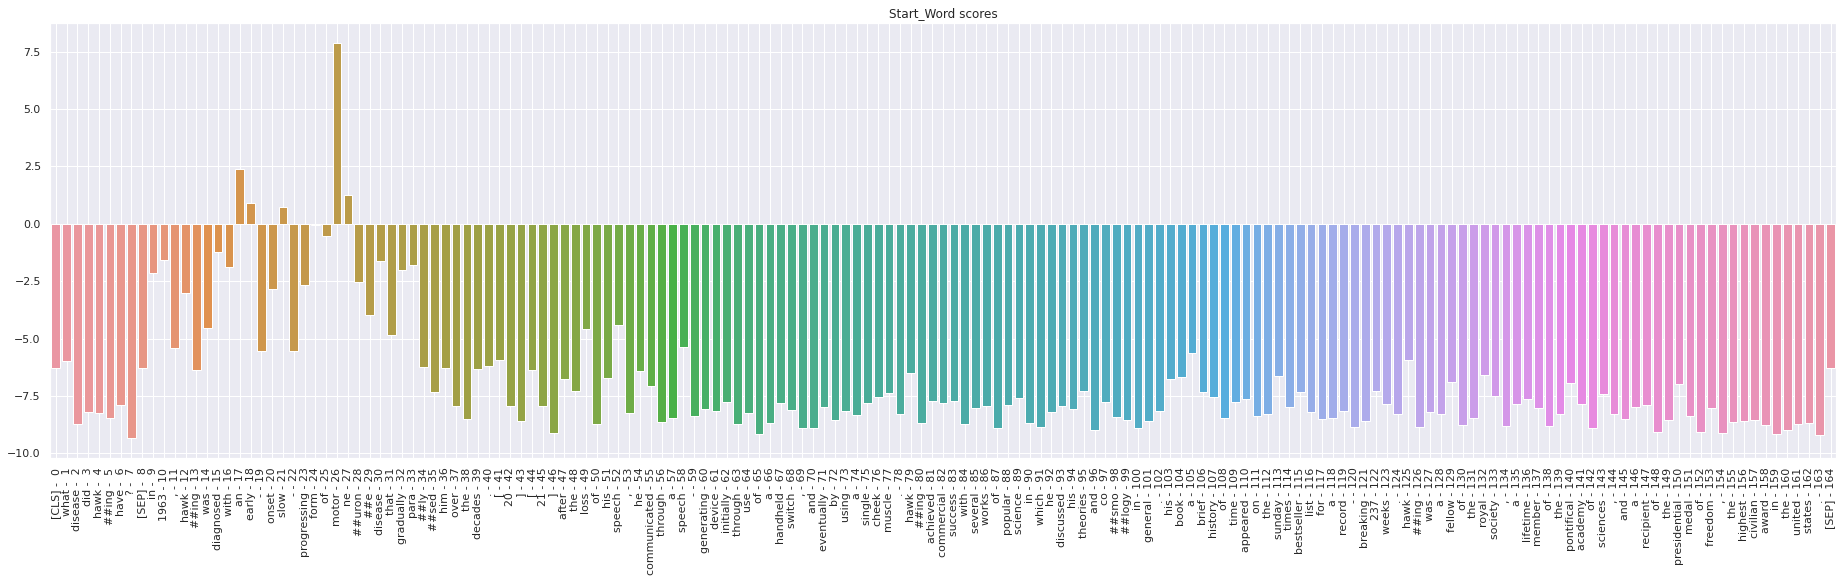

In [ ]:
ax = sns.barplot(x=token_labels, y=np.squeeze(s_scores), ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title('Start_Word scores')

plt.show()

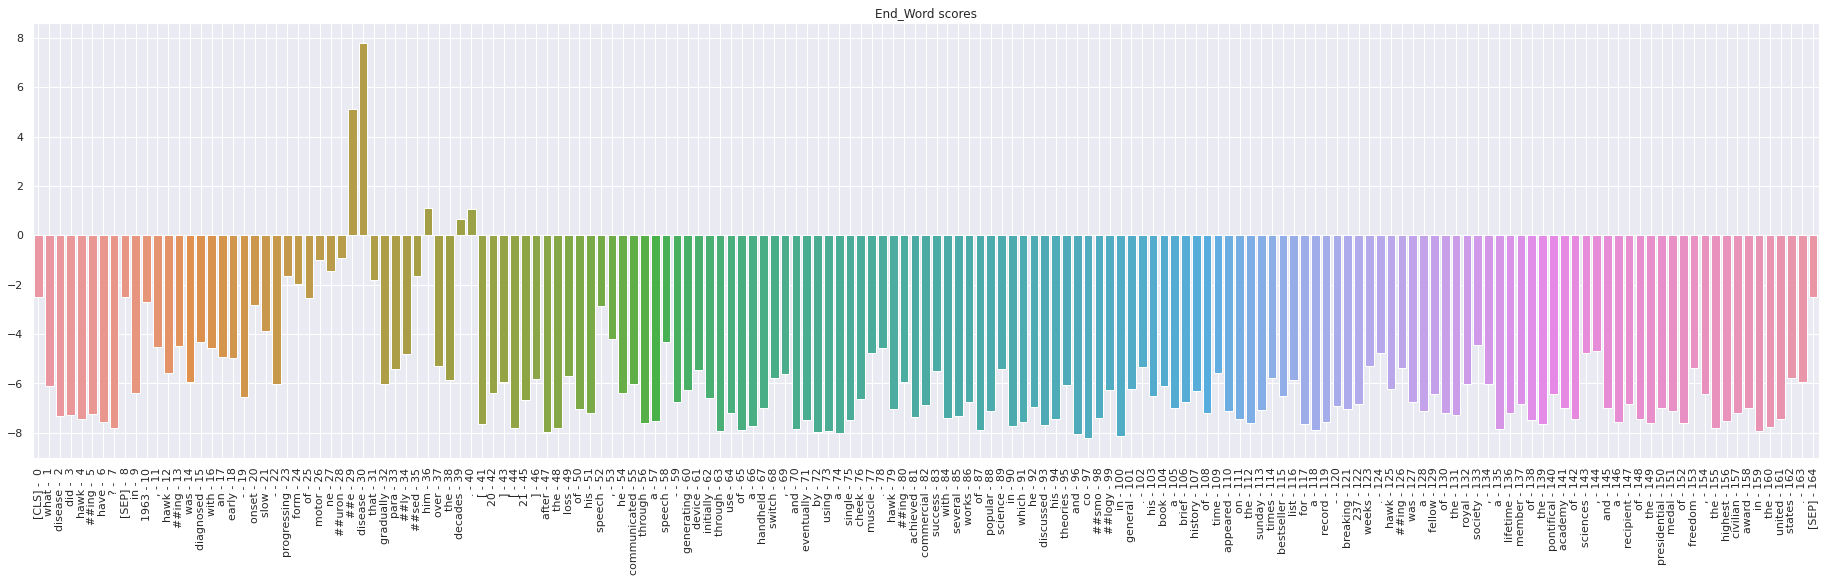

In [ ]:
ax = sns.barplot(x=token_labels, y=np.squeeze(e_scores), ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title('End_Word scores')

plt.show()